## Loading the dataset using Pandas

In [11]:
import pandas as pd
import numpy as np

#read.csv data into pd 
# Loding a seperate Twitter Handles dataset
data_all = pd.read_csv('tweets_supercars.csv', error_bad_lines=False)
Teams = pd.read_excel(open('Twitter Handles.xlsx', 'rb'), sheet_name='Teams')  
Players = pd.read_excel(open('Twitter Handles.xlsx', 'rb'), sheet_name='Players')  

text=data_all['text']

#print the first 3 tweets
print(text[:3])

0    "rt @dariofranchitti: this bathurst race has b...
1    "rt @wtf1couk: gp3 fans while you're waiting f...
2    "rt @sally_fitz: incredible final laps of #bat...
Name: text, dtype: object


In [12]:
#list the first 5 observations 
data_all.head()

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,7:31,007cnt,0.0,0.0,0.0
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,9:04,007pixxx,0.0,0.0,0.0
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,10:20,007pixxx,0.0,0.0,0.0


In [13]:
print(type(text))
print(len(text))

<class 'pandas.core.series.Series'>
13523


In [14]:
data_all.describe()

,id,event_number,player_dummy,team_dummy,weekday,month,day,retweets,likes,comments
count,1.352300e+04,13523.000000,13523.000000,13523.000000,13523.000000,13523.000000,13523.000000,13522.000000,13522.000000,13522.000000
mean,5.098869e+17,9.730977,0.102936,0.008726,6.815426,8.971974,12.715817,0.338707,0.623281,0.113223
std,2.537884e+16,3.038715,0.303886,0.093007,0.444136,2.292286,5.488871,3.102980,5.086552,0.709985
min,4.390000e+17,1.000000,0.000000,0.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,5.210000e+17,11.000000,0.000000,0.000000,7.000000,10.000000,12.000000,0.000000,0.000000,0.000000
50%,5.210000e+17,11.000000,0.000000,0.000000,7.000000,10.000000,12.000000,0.000000,0.000000,0.000000
75%,5.210000e+17,11.000000,0.000000,0.000000,7.000000,10.000000,12.000000,0.000000,0.000000,0.000000
max,5.410000e+17,14.000000,1.000000,1.000000,7.000000,12.000000,29.000000,265.000000,303.000000,39.000000


In [15]:
#Dropping all the duplicate tweets
data_all.drop_duplicates(subset=['text'], inplace=True)

In [16]:
data_all.shape

(10544, 13)

### Word cloud

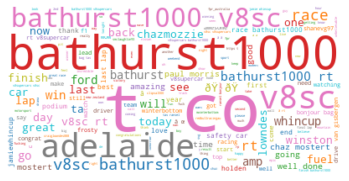

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#aggerate all the tweets into one file and generate the word cloud
text_tweets = data_all['text']
all_tweets = ''.join(text_tweets.tolist())

fig, ax = plt.subplots()
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(all_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Loading the TV Rating Data for analysis

In [18]:
import pandas as pd
import numpy as np

In [19]:
#read.csv data into pd 
tv_data = pd.read_csv('tv_rating_new.csv', error_bad_lines=False);

len(tv_data)

3194

In [20]:
tv_data.head()

,tv_channel,city,tvviewers,start_time,end_time,event_number,weekday
0,7mate Ade,Adelaide,23,14:15,14:29,3,6
1,7mate Ade,Adelaide,23,13:45,13:59,3,7
2,7mate Ade,Adelaide,7,11:45,11:59,4,6
3,7mate Ade,Adelaide,10,12:15,12:29,4,7
4,7mate Ade,Adelaide,22,14:45,14:59,5,7


In [21]:
tv_data['tv_channel'].value_counts()

BTQ7                                       498
ATN7                                       478
7mate Mel                                  301
7mate Per                                  295
7mate Ade                                  276
SAS7                                       269
TVW7                                       258
Southern Cross Tasmania                    247
HSV7                                       247
7mate Tasmania                             200
7mate Bri                                   46
7mate Syd                                   41
7TWO Syd                                    30
BTQ7, 7mate Bri                              2
SAS7, 7mate Ade                              2
ATN7, 7mate Syd                              2
HSV7, 7mate Mel                              1
7mate Tasmania, Southern Cross Tasmania      1
Name: tv_channel, dtype: int64

In [22]:
#Calulating the no.of viewers for a single event
for i in range(1,15):
  df = tv_data[tv_data['event_number'] == i]
  df = df.groupby(['tv_channel']).sum()
  df = df.sort_values('tvviewers', ascending=False)
  print('The Total number of viewers for the event %d' % i)
  print(df.head(3))


# np.where(tv_data['event_number'] == 1, tv_data.groupby(["tv_channel"]).sum(), np.nan)
# tv_data.groupby(["tv_channel"]).sum()

The Total number of viewers for the event 1
            tvviewers  event_number  weekday
tv_channel                                  
ATN7             5146            48      296
BTQ7             4429            50      311
HSV7             4425            48      296
The Total number of viewers for the event 2
            tvviewers  event_number  weekday
tv_channel                                  
ATN7             2573            52      168
BTQ7             2275            52      168
7mate Mel        1541            52      168
The Total number of viewers for the event 3
            tvviewers  event_number  weekday
tv_channel                                  
BTQ7             2592            93      198
7mate Mel        1859           114      244
ATN7             1530            48      112
The Total number of viewers for the event 4
            tvviewers  event_number  weekday
tv_channel                                  
7mate Mel        2059           156      237
BTQ7          

## Extracting Twitter data of Hashtags and Mentions

In [23]:
# Loading Tweets data
tweets_data = pd.read_csv('tweets_supercars.csv', error_bad_lines=False)

In [24]:
#Extracting twitter accounts username from the dataset
tweets_data['mentions'] = tweets_data['text'].str.findall("@\w+")

In [25]:
# Defining Hashag extracting function
import re
def hashtag_extract(x):
    hashtags = re.findall(r"#(\w+)", x)
    return hashtags

In [26]:
# Apply Extracted Hashtags to the dataset
tweets_data['hashtags'] = tweets_data['text'].apply(hashtag_extract)

In [27]:
tweets_data['hashtags'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[bathurst1000]                                                               3415
[bathurst1000, v8sc]                                                         1136
[v8sc]                                                                       1115
[v8sc, bathurst1000]                                                         1037
[adelaide]                                                                    570
                                                                             ... 
[paulfrank, tas, bag, tasanaklucuâ]                                             1
[gettysport, v8sc, wow, nytoday]                                                1
[lookingup, adelaide, architecture, adlarchigram, brutalism]                    1
[ford, bathurst1000, holden, gofigure, getitright, holdengirl, redbull]         1
[supplier, dropship, kalung, tas, dompet, jamtangan, sepatu, baju, iklan]       1
Name: hashtags, Length: 2910, dtype: int64

In [28]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13523 non-null  float64
 1   text              13523 non-null  object 
 2   event_number      13523 non-null  int64  
 3   player_dummy      13523 non-null  int64  
 4   team_dummy        13523 non-null  int64  
 5   weekday           13523 non-null  int64  
 6   month             13523 non-null  int64  
 7   day               13523 non-null  int64  
 8   time              13523 non-null  object 
 9   user_screen_name  13523 non-null  object 
 10  retweets          13522 non-null  float64
 11  likes             13522 non-null  float64
 12  comments          13522 non-null  float64
 13  mentions          13523 non-null  object 
 14  hashtags          13523 non-null  object 
dtypes: float64(4), int64(6), object(5)
memory usage: 1.5+ MB


In [29]:
#Converting the tweets to a list
hashtags = tweets_data['hashtags'].to_list()

In [30]:
s = []
for x in hashtags:
    s.extend(x)

In [31]:
HT_regular = sum(hashtags,[])

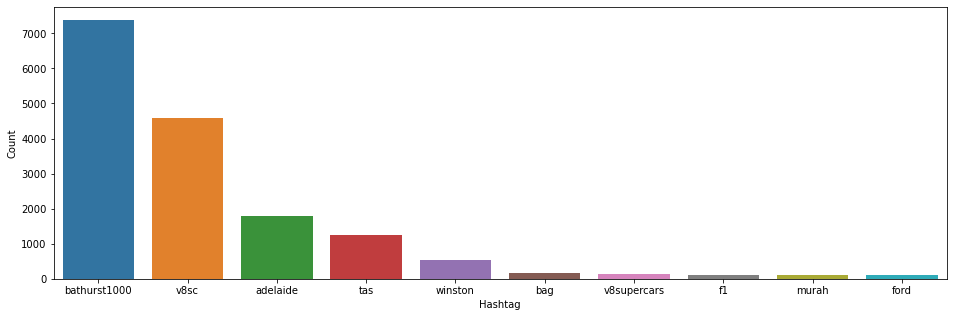

In [32]:
#Getting the Top 10 Hashtags
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [33]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\likhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\likhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\likhi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# Calculating the Polarity Score for the Text Column of the Tweets dataset
tweets_data[['polarity', 'subjectivity']] = tweets_data['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_data['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  tweets_data.loc[index, 'sentiment'] = 'negative'
 elif pos > neg:
  tweets_data.loc[index, 'sentiment'] = 'positive'
 else:
  tweets_data.loc[index, 'sentiment'] = 'neutral'

In [169]:
tweets_data

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,mentions,hashtags,polarity,subjectivity,sentiment,year,Date
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,2014-10-12 07:28:00,007_dot,0.0,0.0,0.0,"[@dariofranchitti, @jcourtâ]",[],0.437500,0.666667,positive,2014,2014-10-12
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,2014-10-12 07:28:00,007_dot,0.0,0.0,0.0,[@wtf1couk],[bathurst1000],0.033333,0.633333,positive,2014,2014-10-12
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,2014-10-12 07:31:00,007cnt,0.0,0.0,0.0,"[@sally_fitz, @jamiewhincup, @redbullraciâ]",[bathurst1000],0.412500,0.662500,positive,2014,2014-10-12
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,2014-10-12 09:04:00,007pixxx,0.0,0.0,0.0,[@v8supercars],[bathurst1000â],0.500000,0.500000,positive,2014,2014-10-12
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,2014-10-12 10:20:00,007pixxx,0.0,0.0,0.0,[@9gag],[bathurst1000],0.100000,0.100000,positive,2014,2014-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,5.210000e+17,"""oh, that is absolutely heartbreaking for shan...",11,0,0,7,10,12,2014-10-12 07:06:00,ztevans,2.0,0.0,0.0,[],"[v8sc, bathurst1000]",0.200000,0.900000,negative,2014,2014-10-12
13519,4.390000e+17,"""rt @off1cial_sport: clipsal 500 #adelaide htt...",1,0,0,6,3,1,2014-03-01 14:34:00,zuhairazrai,0.0,0.0,0.0,[@off1cial_sport],[adelaide],0.000000,0.000000,neutral,2014,2014-03-01
13520,5.260000e+17,"""storm &amp; sunset #adelaide http://t.co/8gym...",12,0,0,7,10,26,2014-10-26 12:50:00,zurijewellery,0.0,0.0,0.0,[],[adelaide],0.000000,0.000000,neutral,2014,2014-10-26
13521,5.210000e+17,"""""you're a pack of arseholes"" still the greate...",11,0,0,7,10,12,2014-10-12 07:47:00,zvyozdochka,0.0,1.0,1.0,[],[bathurst1000],1.000000,1.000000,positive,2014,2014-10-12


In [36]:
#Assigning Tweets to Positive,Negative and Neutral 
text_negative = tweets_data[tweets_data['sentiment']=='negative']
text_positive = tweets_data[tweets_data['sentiment']=='positive']
text_neutral = tweets_data[tweets_data['sentiment']=='neutral']

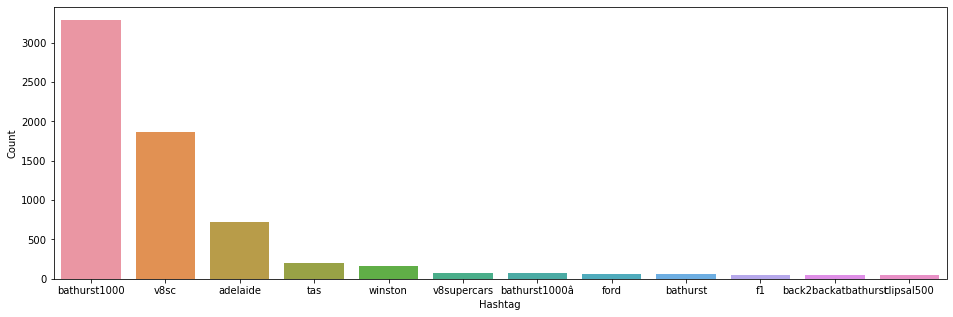

In [37]:
#Top 10 positive hashtags in the dataset
hashtags_positive = text_positive['hashtags'].to_list()
s = []
for x in hashtags_positive:
    s.extend(x)

HT_regular = sum(hashtags_positive,[])

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 13) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [38]:
# Sorting the Hashtags by values
d['Count'] = d['Count'].sort_values()

In [39]:
#Resetting the Count
d.reset_index()

,index,Hashtag,Count
0,0,bathurst1000,3288
1,2,v8sc,1863
2,7,adelaide,721
3,139,tas,201
4,8,winston,165
5,68,v8supercars,78
6,1,bathurst1000â,68
7,32,ford,64
8,105,bathurst,56
9,241,f1,51


In [40]:
#Removing the First Two Highest Hashtags for better understanding of data
d = d[3:]

In [41]:
d

,Hashtag,Count
7,adelaide,721
139,tas,201
8,winston,165
68,v8supercars,78
1,bathurst1000â,68
32,ford,64
105,bathurst,56
241,f1,51
16,back2backatbathurst,48
25,clipsal500,48


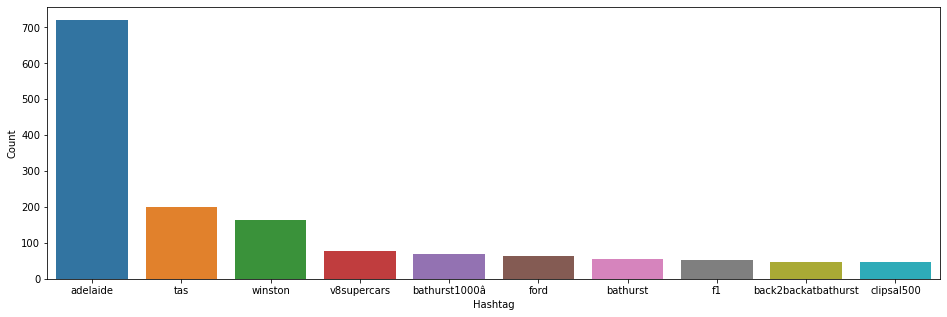

In [42]:
# selecting new top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

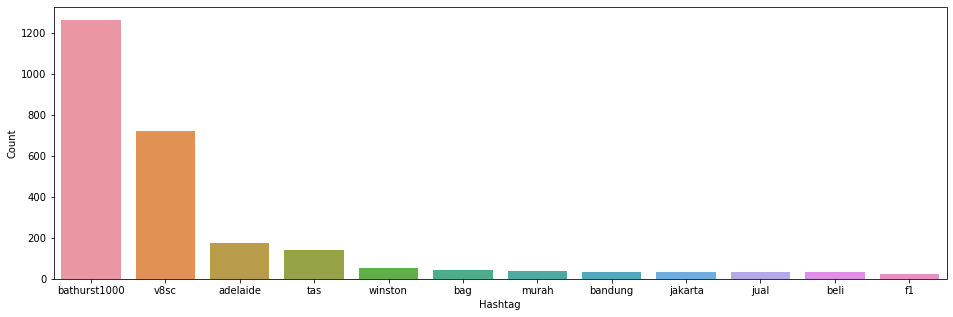

In [43]:
##Top 10 negative hashtags in the dataset
hashtags_negative = text_negative['hashtags'].to_list()
s = []
for x in hashtags_negative:
    s.extend(x)

HT_regular = sum(hashtags_negative,[])

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 12) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [44]:
# Sorting the Hashtags by values
d['Count'] = d['Count'].sort_values()

In [45]:
#Resetting the Count
d.reset_index()

,index,Hashtag,Count
0,6,bathurst1000,1264
1,0,v8sc,720
2,1,adelaide,174
3,23,tas,141
4,12,winston,53
5,24,bag,43
6,22,murah,36
7,18,bandung,33
8,19,jakarta,33
9,20,jual,33


In [46]:
#Removing the First Two Highest Hashtags for better understanding of data
d = d[2:]

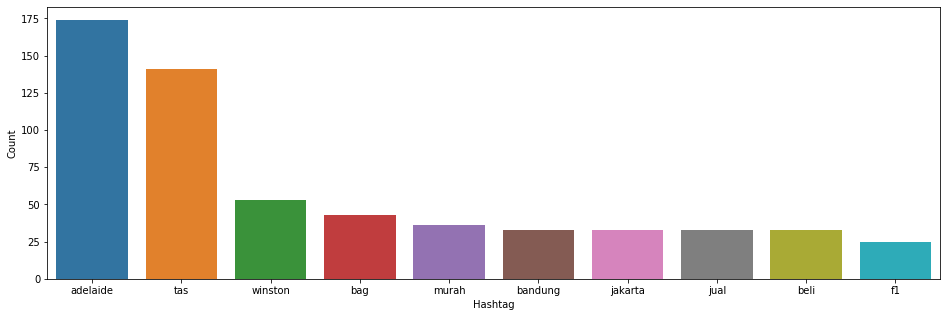

In [47]:
# selecting new top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

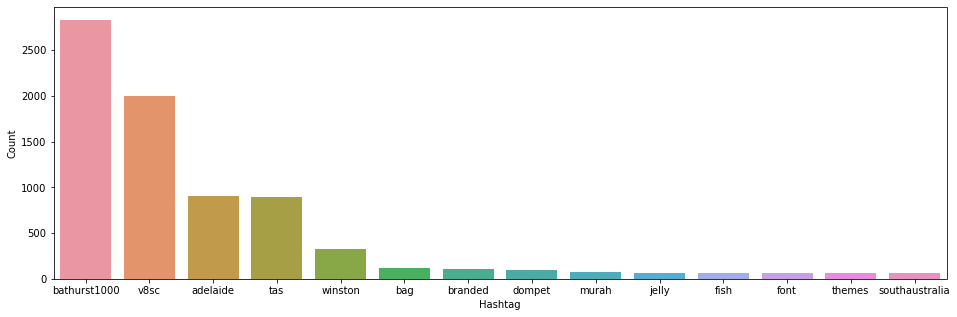

In [48]:
#Top 10 neutral hashtags in the dataset
hashtags_neutral = text_neutral['hashtags'].to_list()
s = []
for x in hashtags_neutral:
    s.extend(x)

HT_regular = sum(hashtags_neutral,[])

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 14) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [49]:
# Sorting the Hashtags by values
d['Count'] = d['Count'].sort_values()

In [50]:
#Resetting the Count
d.reset_index()

,index,Hashtag,Count
0,1,bathurst1000,2830
1,0,v8sc,2000
2,7,adelaide,910
3,11,tas,898
4,12,winston,326
5,351,bag,117
6,457,branded,102
7,414,dompet,96
8,60,murah,72
9,1031,jelly,68


In [51]:
#Removing the First Four Highest Hashtags for better understanding of data
d = d[4:]

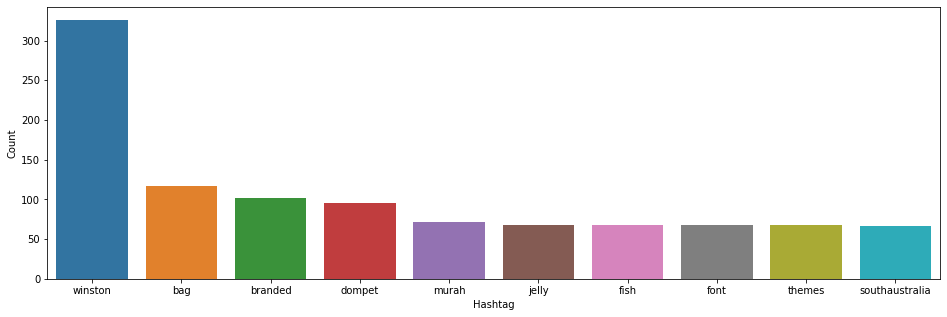

In [52]:
# selecting new top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

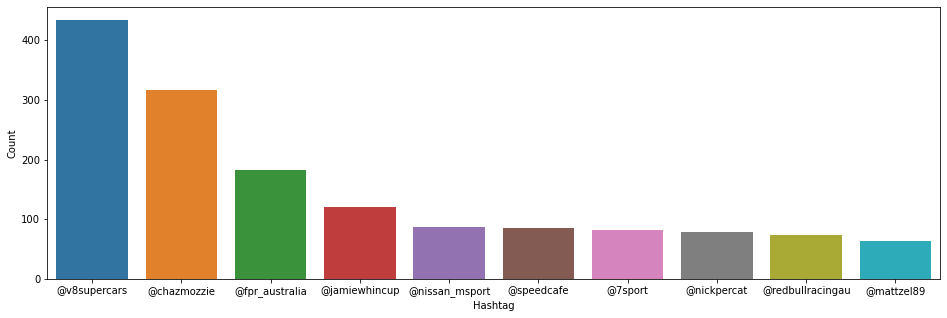

In [53]:
#Top 10 positive accounts mentioned in the dataset
mentions_positive = text_positive['mentions'].to_list()
s = []
for x in mentions_positive:
    s.extend(x)

HT_regular = sum(mentions_positive,[])

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

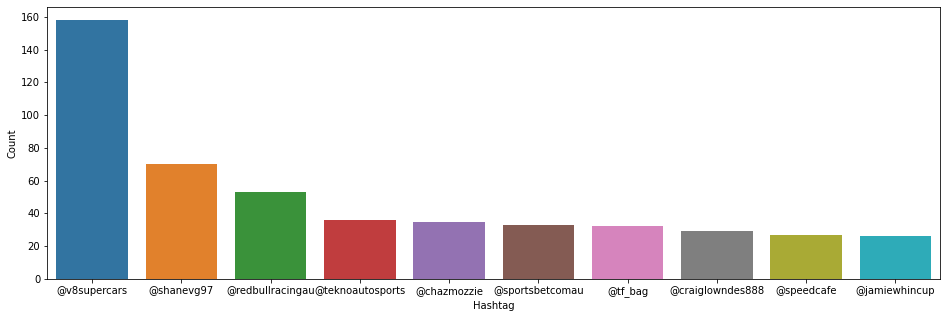

In [54]:
#Top 10 negative accounts mentioned in the dataset
mentions_negative = text_negative['mentions'].to_list()
s = []
for x in mentions_negative:
    s.extend(x)

HT_regular = sum(mentions_negative,[])

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

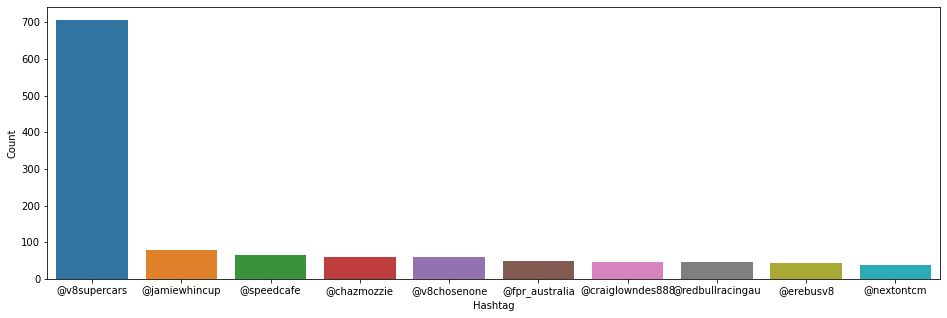

In [55]:
#Top 10 neutral accounts mentioned in the dataset
mentions_neutral = text_neutral['mentions'].to_list()
s = []
for x in mentions_neutral:
    s.extend(x)

HT_regular = sum(mentions_neutral,[])

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [56]:
#Counting no.of time the team has been mentioned
tweets_data['team_dummy'].value_counts()

0    13405
1      118
Name: team_dummy, dtype: int64

In [57]:
#Counting no.of time the player has been mentioned
tweets_data['player_dummy'].value_counts()

0    12131
1     1392
Name: player_dummy, dtype: int64

In [58]:
tweets_data

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,mentions,hashtags,polarity,subjectivity,sentiment
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,"[@dariofranchitti, @jcourtâ]",[],0.437500,0.666667,positive
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,[@wtf1couk],[bathurst1000],0.033333,0.633333,positive
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,7:31,007cnt,0.0,0.0,0.0,"[@sally_fitz, @jamiewhincup, @redbullraciâ]",[bathurst1000],0.412500,0.662500,positive
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,9:04,007pixxx,0.0,0.0,0.0,[@v8supercars],[bathurst1000â],0.500000,0.500000,positive
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,10:20,007pixxx,0.0,0.0,0.0,[@9gag],[bathurst1000],0.100000,0.100000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,5.210000e+17,"""oh, that is absolutely heartbreaking for shan...",11,0,0,7,10,12,7:06,ztevans,2.0,0.0,0.0,[],"[v8sc, bathurst1000]",0.200000,0.900000,negative
13519,4.390000e+17,"""rt @off1cial_sport: clipsal 500 #adelaide htt...",1,0,0,6,3,1,14:34,zuhairazrai,0.0,0.0,0.0,[@off1cial_sport],[adelaide],0.000000,0.000000,neutral
13520,5.260000e+17,"""storm &amp; sunset #adelaide http://t.co/8gym...",12,0,0,7,10,26,12:50,zurijewellery,0.0,0.0,0.0,[],[adelaide],0.000000,0.000000,neutral
13521,5.210000e+17,"""""you're a pack of arseholes"" still the greate...",11,0,0,7,10,12,7:47,zvyozdochka,0.0,1.0,1.0,[],[bathurst1000],1.000000,1.000000,positive


In [59]:
#Converting Player handle and Team Handles to list
player_handle = Players['Player Handle'].to_list()
teams_handle = Teams['Twitter Handle'].to_list()

In [60]:
#Finding teams in the format of Racing, Motorsports, Autosports and then converting them to lowercase
for i in range(len(Teams['Team Name'])):
  k = Teams['Team Name'][i]
  k = k.replace('Racing', '').rstrip()
  k = k.replace('Motorsport', '').rstrip()  
  k = k.replace('Autosports', '').rstrip()
  teams_handle.append(k)
  k = k.lower()
  teams_handle.append(k)  

teams = set(teams_handle)

In [61]:
#Finding Teams in the dataset and assigning 1 to them if mentioned
for i in tweets_data.index:
  if any(k in tweets_data['mentions'][i] for k in teams):
    tweets_data['team_dummy'][i] = 1
  else:
    pass

<ipython-input-61-7e95548e89e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data['team_dummy'][i] = 1


In [62]:
#Recognising Players in Uppercase, Lowercase, First Name and Last Name 
import itertools  
players_names = Players['Player Name'].to_list()
players_2 = players_names.copy()
players_2 = [x.lower() for x in players_2]
players_3 = [x.split() for x in players_2]
players_3 = list(itertools.chain.from_iterable(players_3))
players = players_3 + players_2 + players_names + player_handle

In [63]:
#Finding Players in the dataset and assigning 1 to them if mentioned
for i in tweets_data.index:
  if any(k in tweets_data['mentions'][i] for k in players):
    tweets_data['player_dummy'][i] = 1
  else:
    pass

<ipython-input-63-e9927224a2cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data['player_dummy'][i] = 1


In [64]:
tweets_data['player_dummy'].value_counts()

0    12097
1     1426
Name: player_dummy, dtype: int64

In [65]:
tweets_data['team_dummy'].value_counts()

0    12909
1      614
Name: team_dummy, dtype: int64

### Aggregate the tweets data by every 15 minutes 

In [66]:
tweets_data['year'] = '2014'
tweets_data['Date'] = pd.to_datetime(tweets_data[['year', 'day', 'month']])

In [67]:
tweets_data['Date'] = tweets_data['Date'].astype(str)

In [68]:
tweets_data['time'] = tweets_data['Date'] +' ' + tweets_data['time']

In [69]:
tweets_data['Date'].value_counts().sort_values()

2014-11-16      51
2014-08-03      60
2014-03-29      63
2014-08-24      72
2014-09-13      72
2014-11-15      75
2014-02-28      78
2014-08-02      89
2014-10-10      95
2014-07-05     108
2014-07-06     109
2014-05-18     113
2014-05-17     114
2014-06-22     118
2014-12-06     136
2014-12-07     138
2014-04-25     143
2014-06-21     147
2014-04-06     154
2014-04-27     159
2014-08-23     161
2014-04-05     190
2014-04-26     191
2014-09-14     201
2014-03-01     223
2014-10-11     295
2014-03-02     435
2014-10-26     503
2014-10-12    9230
Name: Date, dtype: int64

In [70]:
tweets_data['time'] = pd.to_datetime(tweets_data['time'])

In [71]:
# grouping data and named aggregation on text, player_dummy, and team_dummy
group_tweet_data = tweets_data.groupby([pd.Grouper('event_number'),pd.Grouper('weekday'),pd.Grouper(key='time', freq='15min')]).agg(number_of_tweet=('text', 'count'),
                                                                              number_of_player=('player_dummy','sum'),
                                                                              number_of_team=('team_dummy','sum'), avg_polarity=('polarity','mean'))

In [72]:
group_tweet_data.head()

number_of_tweet  number_of_player  \
event_number weekday time                                                     
1            5       2014-02-28 14:00:00                8                 0   
                     2014-02-28 14:15:00                7                 1   
                     2014-02-28 14:30:00               15                 0   
                     2014-02-28 14:45:00                8                 4   
                     2014-02-28 15:00:00                6                 0   

                                          number_of_team  avg_polarity  
event_number weekday time                                               
1            5       2014-02-28 14:00:00               0      0.221875  
                     2014-02-28 14:15:00               0      0.140179  
                     2014-02-28 14:30:00               1      0.154167  
                     2014-02-28 14:45:00               0     -0.011458  
                     2014-02-28 15:00:00               0      0.179167

In [73]:
# reset_index
group_tweet_data = group_tweet_data.reset_index()
group_tweet_data.head()

,event_number,weekday,time,number_of_tweet,number_of_player,number_of_team,avg_polarity
0,1,5,2014-02-28 14:00:00,8,0,0,0.221875
1,1,5,2014-02-28 14:15:00,7,1,0,0.140179
2,1,5,2014-02-28 14:30:00,15,0,1,0.154167
3,1,5,2014-02-28 14:45:00,8,4,0,-0.011458
4,1,5,2014-02-28 15:00:00,6,0,0,0.179167


In [74]:
# create start_time to match the tv_rating: time + 15min
import datetime as dt
group_tweet_data['start_time'] = group_tweet_data['time'] + dt.timedelta(minutes=15)

In [75]:
# change the timestamp to string
group_tweet_data['time'] = group_tweet_data['time'].apply(lambda x: x.strftime('%H:%M'))
group_tweet_data['start_time'] = group_tweet_data['start_time'].apply(lambda x: x.strftime('%H:%M'))

In [76]:
group_tweet_data.head()

,event_number,weekday,time,number_of_tweet,number_of_player,number_of_team,avg_polarity,start_time
0,1,5,14:00,8,0,0,0.221875,14:15
1,1,5,14:15,7,1,0,0.140179,14:30
2,1,5,14:30,15,0,1,0.154167,14:45
3,1,5,14:45,8,4,0,-0.011458,15:00
4,1,5,15:00,6,0,0,0.179167,15:15


### Merge the tv rating with aggregated tweet data by event_number weekday start_time and end_time

In [77]:
merged_data = pd.merge(tv_data, group_tweet_data, how='left',
                       left_on=['start_time','event_number','weekday'],
                       right_on=['start_time','event_number','weekday'])

# drop the null value
merged_data = merged_data.dropna()
len(merged_data)

2731

In [78]:
merged_data.head()

,tv_channel,city,tvviewers,start_time,end_time,event_number,weekday,time,number_of_tweet,number_of_player,number_of_team,avg_polarity
0,7mate Ade,Adelaide,23,14:15,14:29,3,6,14:00,8.0,0.0,0.0,0.035156
1,7mate Ade,Adelaide,23,13:45,13:59,3,7,13:30,26.0,3.0,4.0,0.183116
2,7mate Ade,Adelaide,7,11:45,11:59,4,6,11:30,13.0,1.0,0.0,0.067949
3,7mate Ade,Adelaide,10,12:15,12:29,4,7,12:00,21.0,0.0,2.0,0.161111
4,7mate Ade,Adelaide,22,14:45,14:59,5,7,14:30,6.0,0.0,0.0,0.190972


In [79]:
for i in range(1,15):
  df = merged_data[merged_data['event_number'] == i]
  df = df.groupby(['tv_channel']).sum()
  df = df.sort_values('tvviewers', ascending=False)
  print('The Total number of viewers for the event %d' % i)
  print(df.head(5))


# np.where(tv_data['event_number'] == 1, tv_data.groupby(["tv_channel"]).sum(), np.nan)
# tv_data.groupby(["tv_channel"]).sum()

The Total number of viewers for the event 1
            tvviewers  event_number  weekday  number_of_tweet  \
tv_channel                                                      
ATN7             3342            35      207            356.0   
BTQ7             2836            37      222            370.0   
HSV7             2762            35      207            356.0   
SAS7             2115            34      201            338.0   
TVW7             1131            39      233            377.0   

            number_of_player  number_of_team  avg_polarity  
tv_channel                                                  
ATN7                    33.0            19.0      4.535157  
BTQ7                    43.0            19.0      4.461296  
HSV7                    33.0            19.0      4.535157  
SAS7                    33.0            18.0      4.126239  
TVW7                    41.0            19.0      5.470055  
The Total number of viewers for the event 2
                tvviewers  ev

### run regression without polarity
y = log(tvviewers)
x= number of tweets, number of tweets mentioned a player, number of tweets mentioned a team 


In [80]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [81]:
y=merged_data['tvviewers']
#change y to a very small number if it's 0.
y[y==0]=0.0001

In [82]:
X = merged_data[['number_of_tweet','number_of_player','number_of_team']]
y = merged_data['tvviewers']
y = np.log(y)

In [83]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              tvviewers   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     18.12
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.21e-11
Time:                        13:15:22   Log-Likelihood:                -4281.5
No. Observations:                2731   AIC:                             8571.
Df Residuals:                    2727   BIC:                             8595.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.5535      0.032  

### run regression with polarity
y = log(tvviewers)
x= number of tweets, number of tweets mentioned a player, number of tweets mentioned a team average polarity score

In [84]:
y=merged_data['tvviewers']
#change y to a very small number if it's 0.
y[y==0]=0.0001

In [85]:
X = merged_data[['number_of_tweet','number_of_player','number_of_team','avg_polarity']]
y = merged_data['tvviewers']
y = np.log(y)

In [86]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              tvviewers   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     16.00
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           5.90e-13
Time:                        13:15:22   Log-Likelihood:                -4276.8
No. Observations:                2731   AIC:                             8564.
Df Residuals:                    2726   BIC:                             8593.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.4846      0.039  

### Analysing Sentiment analysis and Topic Modelling for Event 11

In [87]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\likhi\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\likhi\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [88]:
#Creating a subset of only event eleven tweets for analysis
event_eleven = tweets_data[tweets_data['event_number'] == 11]

In [89]:
#Cleaning and Preprocessing the data
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import string

def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove rt for retweets
    tweet = re.sub(r'rt\s', '', tweet)
    # Remove special charecters
    tweet = re.sub('[^A-Za-z0-9]+', ' ', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

In [90]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\likhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\likhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\likhi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [91]:
#Applying the Preprocessing to the dataset
event_eleven['text'] = event_eleven['text'].apply(preprocess_tweet_text)

<ipython-input-91-4106520dad3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_eleven['text'] = event_eleven['text'].apply(preprocess_tweet_text)


In [92]:
#Applying Stopwords and converting them to tokens
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.tokenizer import Tokenizer
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


# Custom stopwords
custom_stopwords = ["bathurst","adelaide","http","tas","tcm", "clipsal","sydney","townsville","darwin","coateshire","sandown"]

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []

for doc in tokenizer.pipe(event_eleven['text'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
event_eleven['tokens'] = tokens

<ipython-input-92-39b57815701e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_eleven['tokens'] = tokens


In [93]:
# Make tokens a string again
event_eleven['tokens_back_to_text'] = [' '.join(map(str, l)) for l in event_eleven['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

event_eleven['lemmas'] = event_eleven['tokens_back_to_text'].apply(get_lemmas)


# Make lemmas a string again
event_eleven['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in event_eleven['lemmas']]

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    tokens = re.sub('@*!*\$*', '', text) # Remove @ ! $
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE

    tokens = tokens.lower().split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
event_eleven['lemma_tokens'] = event_eleven['lemmas_back_to_text'].apply(tokenize)

<>:38: DeprecationWarning: invalid escape sequence \w
<>:39: DeprecationWarning: invalid escape sequence \$
<ipython-input-93-0dfc4031e6e1>:38: DeprecationWarning: invalid escape sequence \w
  tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
<ipython-input-93-0dfc4031e6e1>:39: DeprecationWarning: invalid escape sequence \$
  tokens = re.sub('@*!*\$*', '', text) # Remove @ ! $
<ipython-input-93-0dfc4031e6e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_eleven['tokens_back_to_text'] = [' '.join(map(str, l)) for l in event_eleven['tokens']]
<ipython-input-93-0dfc4031e6e1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [94]:
#Lemmatizing the dataset
data_lemmatized = event_eleven['lemmas']

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


In [95]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('absolute', 1),
  ('aussie', 1),
  ('belter', 1),
  ('commentary', 1),
  ('hope', 1),
  ('love', 1),
  ('mate', 1),
  ('race', 1),
  ('well', 1)]]

In [96]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [97]:
#Top 10 topics
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.102*"amp" + 0.075*"great" + 0.063*"new" + 0.059*"fuel" + 0.044*"like" + '
  '0.024*"turn" + 0.020*"believe" + 0.016*"think" + 0.015*"moment" + '
  '0.014*"winston"'),
 (1,
  '0.307*"bathurst1000" + 0.193*"v8sc" + 0.055*"race" + 0.029*"finish" + '
  '0.029*"whincup" + 0.028*"lap" + 0.021*"ford" + 0.016*"5" + 0.013*"year" + '
  '0.011*"get"'),
 (2,
  '0.068*"3" + 0.052*"7" + 0.046*"tt" + 0.041*"zealand" + 0.034*"trend" + '
  '0.034*"8" + 0.032*"taswanita" + 0.029*"topic" + 0.024*"handbag" + '
  '0.021*"000"'),
 (3,
  '0.121*"chaz" + 0.078*"morris" + 0.066*"paul" + 0.044*"2014" + '
  '0.044*"frosty" + 0.043*"mountain" + 0.042*"mosteand" + 0.031*"australia" + '
  '0.030*"king" + 0.030*"win"'),
 (4,
  '0.036*"love" + 0.036*"come" + 0.031*"see" + 0.030*"incredible" + '
  '0.028*"red" + 0.028*"motor" + 0.028*"well" + 0.026*"want" + 0.025*"epic" + '
  '0.022*"home"'),
 (5,
  '0.058*"long" + 0.043*"amazing" + 0.027*"team" + 0.025*"say" + '
  '0.024*"congrat" + 0.024*"look" + 0.023*"bi

In [98]:
#Sentiment Analysis for Event 11

In [99]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
event_eleven

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,...,polarity,subjectivity,sentiment,year,Date,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens
0,5.210000e+17,bathurst race absolute belter love aussie comm...,11,0,0,7,10,12,2014-10-12 07:28:00,007_dot,...,0.437500,0.666667,positive,2014,2014-10-12,"[race, absolute, belter, love, aussie, comment...",race absolute belter love aussie commentary ho...,"[race, absolute, belter, love, aussie, comment...",race absolute belter love aussie commentary ho...,"[race, absolute, belter, love, aussie, comment..."
1,5.210000e+17,gp3 fans waiting race resume flick bathurst100...,11,0,0,7,10,12,2014-10-12 07:28:00,007_dot,...,0.033333,0.633333,positive,2014,2014-10-12,"[gp3, fans, waiting, race, resume, flick, bath...",gp3 fans waiting race resume flick bathurst100...,"[gp3, fan, wait, race, resume, flick, bathurst...",gp3 fan wait race resume flick bathurst1000 ex...,"[gp3, fan, wait, race, resume, flick, bathurst..."
2,5.210000e+17,incredible final laps bathurst1000 remarkable ...,11,1,0,7,10,12,2014-10-12 07:31:00,007cnt,...,0.412500,0.662500,positive,2014,2014-10-12,"[incredible, final, laps, bathurst1000, remark...",incredible final laps bathurst1000 remarkable ...,"[incredible, final, lap, bathurst1000, remarka...",incredible final lap bathurst1000 remarkable c...,"[incredible, final, lap, bathurst1000, remarka..."
3,5.210000e+17,top 10 mostert moffat percat w davison whincup...,11,0,0,7,10,12,2014-10-12 09:04:00,007pixxx,...,0.500000,0.500000,positive,2014,2014-10-12,"[10, mostert, moffat, percat, w, davison, whin...",10 mostert moffat percat w davison whincup win...,"[10, mostert, moffat, percat, w, davison, whin...",10 mostert moffat percat w davison whincup win...,"[10, mostert, moffat, percat, w, davison, whin..."
4,5.210000e+17,bathurst1000 present fully street legal ford f...,11,0,0,7,10,12,2014-10-12 10:20:00,007pixxx,...,0.100000,0.100000,positive,2014,2014-10-12,"[bathurst1000, present, fully, street, legal, ...",bathurst1000 present fully street legal ford f650,"[bathurst1000, present, fully, street, legal, ...",bathurst1000 present fully street legal ford f650,"[bathurst1000, present, fully, street, legal, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13516,5.210000e+17,race bathurst1000 v8sc,11,0,0,7,10,12,2014-10-12 07:35:00,ztevans,...,0.000000,0.000000,neutral,2014,2014-10-12,"[race, bathurst1000, v8sc]",race bathurst1000 v8sc,"[race, bathurst1000, v8sc]",race bathurst1000 v8sc,"[race, bathurst1000, v8sc]"
13517,5.210000e+17,racing fan still awake want click link excitin...,11,0,0,7,10,12,2014-10-12 07:13:00,ztevans,...,0.300000,0.800000,positive,2014,2014-10-12,"[racing, fan, awake, want, click, link, exciti...",racing fan awake want click link exciting fini...,"[race, fan, awake, want, click, link, exciting...",race fan awake want click link exciting finish...,"[race, fan, awake, want, click, link, exciting..."
13518,5.210000e+17,oh absolutely heartbreaking shane van gisberge...,11,0,0,7,10,12,2014-10-12 07:06:00,ztevans,...,0.200000,0.900000,negative,2014,2014-10-12,"[oh, absolutely, heartbreaking, shane, van, gi...",oh absolutely heartbreaking shane van gisberge...,"[oh, absolutely, heartbreaking, shane, van, gi...",oh absolutely heartbreaking shane van gisberge...,"[oh, absolutely, heartbreaking, shane, van, gi..."
13521,5.210000e+17,pack arseholes still greatest bathurst1000 vic...,11,0,0,7,10,12,2014-10-12 07:47:00,zvyozdochka,...,1.000000,1.000000,positive,2014,2014-10-12,"[pack, arseholes, greatest, bathurst1000, vict...",pack arseholes greatest bathurst1000 victory s...,"[pack, arsehole, great, bathurst1000, victory,...",pack arsehole great bathurst1000 victory speech,"[pack, arsehole, great, bathurst1000, victory,..."


In [101]:
#Dropping any duplicates in the dataset if any
event_eleven['text'].drop_duplicates(inplace = True)
event_eleven.shape

<ipython-input-101-0ad516cce1fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_eleven['text'].drop_duplicates(inplace = True)


(9620, 25)

In [102]:
#Finding the Account Names
event_eleven['names'] = event_eleven['text'].str.findall("@\w+")

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-102-fe66b71361bd>:2: DeprecationWarning: invalid escape sequence \w
  event_eleven['names'] = event_eleven['text'].str.findall("@\w+")
<ipython-input-102-fe66b71361bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_eleven['names'] = event_eleven['text'].str.findall("@\w+")


In [103]:
#Preprocessing
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove rt for retweets
    tweet = re.sub(r'rt\s', '', tweet)
    # Remove special charecters
    tweet = re.sub('[^A-Za-z0-9]+', ' ', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'bathurst1000', 'bathurst', 'v8sc'])
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

In [104]:
#Applying the Prerocessing to the dataset
event_eleven['cleaned_text'] = event_eleven['text'].apply(preprocess_tweet_text)

<ipython-input-104-c0dd3b615a3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_eleven['cleaned_text'] = event_eleven['text'].apply(preprocess_tweet_text)


In [105]:
#Calulating the Polarity of the dataset on Tweets
event_eleven[['polarity', 'subjectivity']] = event_eleven['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in event_eleven['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  event_eleven.loc[index, 'sentiment'] = 'negative'
 elif pos > neg:
  event_eleven.loc[index, 'sentiment'] = 'positive'
 else:
  event_eleven.loc[index, 'sentiment'] = 'neutral'

C:\Users\likhi\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\likhi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [106]:
#Assigning Sentiment to the Each Tweet
text_negative = event_eleven[event_eleven['sentiment']=='negative']
text_positive = event_eleven[event_eleven['sentiment']=='positive']
text_neutral = event_eleven[event_eleven['sentiment']=='neutral']

In [107]:
#Calculating the No.of Tweets and their Sentiment 
def count_values_in_column(event_eleven,feature):
 total=event_eleven.loc[:,feature].value_counts(dropna=False)
 percentage=round(event_eleven.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(event_eleven,'sentiment')

,Total,Percentage
positive,4312,44.82
neutral,3745,38.93
negative,1563,16.25


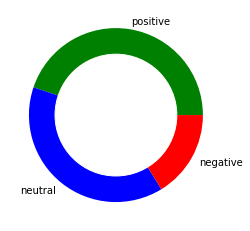

In [108]:
#Create data for Pie Chart
pichart = count_values_in_column(event_eleven,'sentiment')
names= pichart.index
size=pichart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

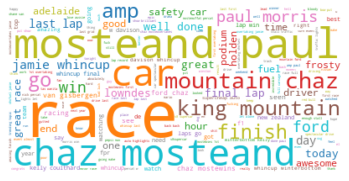

In [109]:
#Word Cloud for Event 11
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#aggerate all the tweets into one file and generate the word cloud
text_tweets = event_eleven['cleaned_text']
all_tweets = ''.join(text_tweets.tolist())


fig, ax = plt.subplots()
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(all_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [110]:
#Assigning One-Hot Encding Values for Each Sentiment 
X = event_eleven['cleaned_text']
y_dict = {'neutral':0, 'positive':-1, 'negative':1}
y = event_eleven['sentiment'].map(y_dict)

In [111]:
#Performing logistic regression on word count:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
  
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 Positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 Negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [112]:
#TF-IDF vectorizer is added to logistic regression to improve the model accuracy and showing the Top 20 Positive and Negative Words for Event 11
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 8045
# train records: 7215
# test records: 2405
Model Accuracy: 0.8756756756756757

-Top 20 Positive-
           Word  Coefficient
            win     6.116034
          great     5.541477
           best     4.784657
        amazing     4.525983
            wow     4.388130
           good     4.126690
           like     3.980202
           wins     3.553068
        awesome     3.496389
         safety     3.430180
           love     3.399290
       congrats     3.383768
congratulations     2.999482
       exciting     2.946511
   unbelievable     2.790577
      brilliant     2.703710
           huge     2.501643
        winning     2.442249
           save     2.438506
         better     2.434297

-Top 20 Negative-
      Word  Coefficient
   started    -0.890365
       wtf    -0.905777
   edwards    -0.918112
      shit    -0.938949
    moffat    -0.956045
 mosteroof    -0.973325
       tas    -1.005004
heartbreak    -1.042965
  panorama    -1.049427
      poor    -1.0

### Analysing Sentiment analysis and Topic Modelling for Event 13

In [113]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
#Creating a subset of only event eleven tweets for analysis
event_thirteen = tweets_data[tweets_data['event_number'] == 13]

In [115]:
#Cleaning and Preprocessing the data
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove rt for retweets
    tweet = re.sub(r'rt\s', '', tweet)
    # Remove special charecters
    tweet = re.sub('[^A-Za-z0-9]+', ' ', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'bathurst1000', 'bathurst', 'v8sc'])
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

In [116]:
#Applying the Preprocessing to the dataset
event_thirteen['cleaned_text'] = event_thirteen['text'].apply(preprocess_tweet_text)

<ipython-input-116-97170f10911d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_thirteen['cleaned_text'] = event_thirteen['text'].apply(preprocess_tweet_text)


In [117]:
#Applying Stopwords and converting them to tokens
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.tokenizer import Tokenizer
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


# Custom stopwords
custom_stopwords = ["bathurst","adelaide","http","tas","tcm", "clipsal","sydney","townsville","darwin","coateshire","sandown"]

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []

for doc in tokenizer.pipe(event_thirteen['cleaned_text'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
event_thirteen['tokens'] = tokens

<ipython-input-117-59c96fa0eacb>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_thirteen['tokens'] = tokens


In [118]:
# Make tokens a string again
event_thirteen['tokens_back_to_text'] = [' '.join(map(str, l)) for l in event_thirteen['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

event_thirteen['lemmas'] = event_thirteen['tokens_back_to_text'].apply(get_lemmas)


# Make lemmas a string again
event_thirteen['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in event_thirteen['lemmas']]

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    tokens = re.sub('@*!*\$*', '', text) # Remove @ ! $
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE

    tokens = tokens.lower().split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
event_thirteen['lemma_tokens'] = event_thirteen['lemmas_back_to_text'].apply(tokenize)

<>:38: DeprecationWarning: invalid escape sequence \w
<>:39: DeprecationWarning: invalid escape sequence \$
<ipython-input-118-cd2f6c245bb4>:38: DeprecationWarning: invalid escape sequence \w
  tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
<ipython-input-118-cd2f6c245bb4>:39: DeprecationWarning: invalid escape sequence \$
  tokens = re.sub('@*!*\$*', '', text) # Remove @ ! $
<ipython-input-118-cd2f6c245bb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_thirteen['tokens_back_to_text'] = [' '.join(map(str, l)) for l in event_thirteen['tokens']]
<ipython-input-118-cd2f6c245bb4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [119]:
#Lemmatizing the dataset
data_lemmatized = event_thirteen['lemmas']

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [120]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('bbau', 1), ('girl', 1), ('win', 1)]]

In [121]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [122]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.048*"winston" + 0.036*"price" + 0.027*"fashionbagimpor" + '
  '0.027*"tasimpor" + 0.027*"tasfashion" + 0.027*"tascewek" + 0.027*"trendy" + '
  '0.027*"tasimporkorea" + 0.024*"st" + 0.018*"htt"'),
 (1,
  '0.014*"ta" + 0.014*"fashion" + 0.014*"follow" + 0.010*"kar" + 0.010*"amp" + '
  '0.010*"k" + 0.010*"pin" + 0.010*"babe" + 0.010*"south" + 0.010*"invite"'),
 (2,
  '0.040*"lens" + 0.039*"amp" + 0.022*"pridemarch" + 0.022*"mary" + '
  '0.020*"pin" + 0.020*"eye" + 0.020*"dompet" + 0.020*"font" + 0.020*"jelly" + '
  '0.020*"info"'),
 (3,
  '0.027*"winston" + 0.026*"like" + 0.024*"la" + 0.016*"kita" + '
  '0.016*"hearing" + 0.016*"kong" + 0.016*"n" + 0.016*"9na" + 0.016*"carrera" '
  '+ 0.016*"conseguido"'),
 (4,
  '0.038*"yang" + 0.019*"job" + 0.018*"melihat" + 0.018*"kita" + 0.018*"semua" '
  '+ 0.018*"seharusnya" + 0.018*"pelajaran" + 0.018*"mereka" + 0.018*"tak" + '
  '0.018*"ada"'),
 (5,
  '0.067*"bag" + 0.021*"fashionbagimpor" + 0.021*"tasfashion" + '
  '0.021*"tasimpor" + 0

In [123]:
#Sentiment Analysis for Event 13

In [124]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
event_thirteen

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,...,subjectivity,sentiment,year,Date,cleaned_text,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens
582,5.330000e+17,"""rt @priyabb9: #adelaide and @southaustralia g...",13,0,0,6,11,15,2014-11-15 13:56:00,adelaidejerks,...,0.550,positive,2014,2014-11-15,adelaide get behind adelaide girl win bbau,"[girl, win, bbau]",girl win bbau,"[girl, win, bbau]",girl win bbau,"[girl, win, bbau]"
604,5.330000e+17,"""fashion icons at the art gallery of south aus...",13,0,0,6,11,15,2014-11-15 14:46:00,adelaidenights,...,0.000,neutral,2014,2014-11-15,fashion icons agallery south australia via hea...,"[fashion, icons, agallery, south, australia, h...",fashion icons agallery south australia head south,"[fashion, icon, agallery, south, australia, he...",fashion icon agallery south australia head south,"[fashion, icon, agallery, south, australia, he..."
605,5.340000e+17,"""the babes at enigma bar on sat nov 15 via @th...",13,0,0,7,11,16,2014-11-16 16:27:00,adelaidenights,...,0.750,positive,2014,2014-11-16,babes enigma bar sat nov 15 via babes beyond e...,"[babes, enigma, bar, sat, nov, 15, babes, exci...",babes enigma bar sat nov 15 babes excited paof,"[babe, enigma, bar, sit, nov, 15, babe, excite...",babe enigma bar sit nov 15 babe excite paof,"[babe, enigma, bar, sit, nov, 15, babe, excite..."
607,5.330000e+17,"""festival centre call out for musicians, summe...",13,0,0,6,11,15,2014-11-15 13:44:00,adelaidenights,...,0.000,positive,2014,2014-11-15,festival centre call musicians summer 2015 loc...,"[festival, centre, musicians, summer, 2015, lo...",festival centre musicians summer 2015 local mu...,"[festival, centre, musician, summer, 2015, loc...",festival centre musician summer 2015 local mus...,"[festival, centre, musician, summer, 2015, loc..."
611,5.340000e+17,"""oneshift - full time bar staff job in #adelai...",13,0,0,7,11,16,2014-11-16 15:24:00,adelaidenights,...,0.775,positive,2014,2014-11-16,oneshift full time bar staff job adelaide sa 6...,"[oneshift, time, bar, staff, job, sa, 65931, b...",oneshift time bar staff job sa 65931 brilliant...,"[oneshift, time, bar, staff, job, 65931, brill...",oneshift time bar staff job 65931 brilliant op...,"[oneshift, time, bar, staff, job, 65931, brill..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12477,5.330000e+17,"""we are trending! #voff4 #tas #trueartistsstud...",13,0,0,6,11,15,2014-11-15 13:54:00,trueartistfilm,...,0.000,neutral,2014,2014-11-15,trending voff4 tas trueartistsstudio trueartis...,"[trending, voff4, trueartistsstudio, trueartis...",trending voff4 trueartistsstudio trueartist ho...,"[trend, voff4, trueartistsstudio, trueartist, ...",trend voff4 trueartistsstudio trueartist howno...,"[trend, voff4, trueartistsstudio, trueartist, ..."
12589,5.330000e+17,"""rt @missjehenderson: thanks for dinner @matth...",13,0,0,6,11,15,2014-11-15 13:31:00,tysonstelzer,...,0.350,positive,2014,2014-11-15,thanks dinner sarah top night peel st adelaide...,"[thanks, dinner, sarah, night, peel, st, wine,...",thanks dinner sarah night peel st wine htt,"[thank, dinner, sarah, night, peel, st, wine, ...",thank dinner sarah night peel st wine htt,"[thank, dinner, sarah, night, peel, st, wine, ..."
12925,5.330000e+17,"""tak ada yang sia. semua jadi pelajaran dan se...",13,0,0,6,11,15,2014-11-15 15:09:00,wanggawidiya,...,0.000,neutral,2014,2014-11-15,tak ada yang sia semua jadi pelajaran dan seha...,"[tak, ada, yang, sia, semua, jadi, pelajaran, ...",tak ada yang sia semua jadi pelajaran dan seha...,"[tak, ada, yang, sia, semua, jadi, pelajaran, ...",tak ada yang sia semua jadi pelajaran dan seha...,"[tak, ada, yang, sia, semua, jadi, pelajaran, ..."
12926,5.330000e+17,"""dan rencana yang kita cipta selama dua bulan ...",13,0,0,6,11,15,2014-11-15 15:09:00,wanggawidiya,...,0.000,neutral,2014,2014-11-15,dan rencana yang kita cipta selama dua bulan b...,"[dan, rencana, yan

In [126]:
#Dropping any duplicates in the dataset if any
event_thirteen['text'].drop_duplicates(inplace = True)
event_thirteen.shape

<ipython-input-126-0bba0761c05d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_thirteen['text'].drop_duplicates(inplace = True)


(126, 26)

In [127]:
event_thirteen

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,...,subjectivity,sentiment,year,Date,cleaned_text,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens
582,5.330000e+17,"""rt @priyabb9: #adelaide and @southaustralia g...",13,0,0,6,11,15,2014-11-15 13:56:00,adelaidejerks,...,0.550,positive,2014,2014-11-15,adelaide get behind adelaide girl win bbau,"[girl, win, bbau]",girl win bbau,"[girl, win, bbau]",girl win bbau,"[girl, win, bbau]"
604,5.330000e+17,"""fashion icons at the art gallery of south aus...",13,0,0,6,11,15,2014-11-15 14:46:00,adelaidenights,...,0.000,neutral,2014,2014-11-15,fashion icons agallery south australia via hea...,"[fashion, icons, agallery, south, australia, h...",fashion icons agallery south australia head south,"[fashion, icon, agallery, south, australia, he...",fashion icon agallery south australia head south,"[fashion, icon, agallery, south, australia, he..."
605,5.340000e+17,"""the babes at enigma bar on sat nov 15 via @th...",13,0,0,7,11,16,2014-11-16 16:27:00,adelaidenights,...,0.750,positive,2014,2014-11-16,babes enigma bar sat nov 15 via babes beyond e...,"[babes, enigma, bar, sat, nov, 15, babes, exci...",babes enigma bar sat nov 15 babes excited paof,"[babe, enigma, bar, sit, nov, 15, babe, excite...",babe enigma bar sit nov 15 babe excite paof,"[babe, enigma, bar, sit, nov, 15, babe, excite..."
607,5.330000e+17,"""festival centre call out for musicians, summe...",13,0,0,6,11,15,2014-11-15 13:44:00,adelaidenights,...,0.000,positive,2014,2014-11-15,festival centre call musicians summer 2015 loc...,"[festival, centre, musicians, summer, 2015, lo...",festival centre musicians summer 2015 local mu...,"[festival, centre, musician, summer, 2015, loc...",festival centre musician summer 2015 local mus...,"[festival, centre, musician, summer, 2015, loc..."
611,5.340000e+17,"""oneshift - full time bar staff job in #adelai...",13,0,0,7,11,16,2014-11-16 15:24:00,adelaidenights,...,0.775,positive,2014,2014-11-16,oneshift full time bar staff job adelaide sa 6...,"[oneshift, time, bar, staff, job, sa, 65931, b...",oneshift time bar staff job sa 65931 brilliant...,"[oneshift, time, bar, staff, job, 65931, brill...",oneshift time bar staff job 65931 brilliant op...,"[oneshift, time, bar, staff, job, 65931, brill..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12477,5.330000e+17,"""we are trending! #voff4 #tas #trueartistsstud...",13,0,0,6,11,15,2014-11-15 13:54:00,trueartistfilm,...,0.000,neutral,2014,2014-11-15,trending voff4 tas trueartistsstudio trueartis...,"[trending, voff4, trueartistsstudio, trueartis...",trending voff4 trueartistsstudio trueartist ho...,"[trend, voff4, trueartistsstudio, trueartist, ...",trend voff4 trueartistsstudio trueartist howno...,"[trend, voff4, trueartistsstudio, trueartist, ..."
12589,5.330000e+17,"""rt @missjehenderson: thanks for dinner @matth...",13,0,0,6,11,15,2014-11-15 13:31:00,tysonstelzer,...,0.350,positive,2014,2014-11-15,thanks dinner sarah top night peel st adelaide...,"[thanks, dinner, sarah, night, peel, st, wine,...",thanks dinner sarah night peel st wine htt,"[thank, dinner, sarah, night, peel, st, wine, ...",thank dinner sarah night peel st wine htt,"[thank, dinner, sarah, night, peel, st, wine, ..."
12925,5.330000e+17,"""tak ada yang sia. semua jadi pelajaran dan se...",13,0,0,6,11,15,2014-11-15 15:09:00,wanggawidiya,...,0.000,neutral,2014,2014-11-15,tak ada yang sia semua jadi pelajaran dan seha...,"[tak, ada, yang, sia, semua, jadi, pelajaran, ...",tak ada yang sia semua jadi pelajaran dan seha...,"[tak, ada, yang, sia, semua, jadi, pelajaran, ...",tak ada yang sia semua jadi pelajaran dan seha...,"[tak, ada, yang, sia, semua, jadi, pelajaran, ..."
12926,5.330000e+17,"""dan rencana yang kita cipta selama dua bulan ...",13,0,0,6,11,15,2014-11-15 15:09:00,wanggawidiya,...,0.000,neutral,2014,2014-11-15,dan rencana yang kita cipta selama dua bulan b...,"[dan, rencana, yan

In [128]:
#Calulating the Polarity of the dataset on Tweets
event_thirteen[['polarity', 'subjectivity']] = event_thirteen['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in event_thirteen['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  event_thirteen.loc[index, 'sentiment'] = 'negative'
 elif pos > neg:
  event_thirteen.loc[index, 'sentiment'] = 'positive'
 else:
  event_thirteen.loc[index, 'sentiment'] = 'neutral'

C:\Users\likhi\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\likhi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [129]:
#Assigning Sentiment to the Each Tweet
text_negative = event_thirteen[event_thirteen['sentiment']=='negative']
text_positive = event_thirteen[event_thirteen['sentiment']=='positive']
text_neutral = event_thirteen[event_thirteen['sentiment']=='neutral']

In [130]:
#Calculating the No.of Tweets and their Sentiment
def count_values_in_column(event_eleven,feature):
 total=event_thirteen.loc[:,feature].value_counts(dropna=False)
 percentage=round(event_thirteen.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(event_thirteen,'sentiment')

,Total,Percentage
neutral,67,53.17
positive,51,40.48
negative,8,6.35


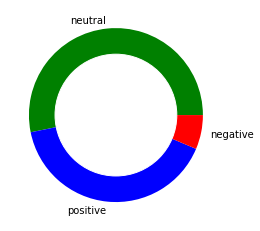

In [131]:
# create data for Pie Chart
pichart = count_values_in_column(event_thirteen,'sentiment')
names= pichart.index
size=pichart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

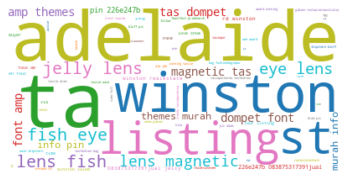

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#aggerate all the tweets into one file and generate the word cloud
text_tweets = event_thirteen['cleaned_text']
all_tweets = ''.join(text_tweets.tolist())


fig, ax = plt.subplots()
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(all_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [133]:
#Assigning One-Hot Encding Values for Each Sentiment 
X_thirteen = event_thirteen['cleaned_text']
y_dict = {'neutral':0, 'positive':-1, 'negative':1}
y_thirteen = event_thirteen['sentiment'].map(y_dict)

In [134]:
#Performing logistic regression on word count:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
c = CountVectorizer(stop_words = 'english')

def text_fit(X_thirteen, y_thirteen, model,clf_model,coef_show=1):
  
    X_c = model.fit_transform(X_thirteen)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y_thirteen, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 Positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 Negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [135]:
#TF-IDF vectorizer is added to logistic regression to improve the model accuracy
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X_thirteen, y_thirteen, tfidf, LogisticRegression())

# features: 671
# train records: 94
# test records: 32
Model Accuracy: 0.59375

-Top 20 Positive-
      Word  Coefficient
       win     0.474605
      love     0.471686
       job     0.372421
       new     0.314063
   evening     0.293907
      good     0.293907
      eyes     0.292682
 feastfest     0.283245
pridemarch     0.283245
     salem     0.279431
  bangbang     0.279235
        fb     0.268383
      free     0.263297
       bmm     0.262307
    opened     0.249852
      kong     0.244816
    dating     0.240599
   ireland     0.237545
        sa     0.236998
    better     0.228821

-Top 20 Negative-
            Word  Coefficient
        fdmcraft    -0.201497
              nw    -0.205494
            fous    -0.212156
           buyer    -0.219771
         looking    -0.219771
       strandtas    -0.224459
     heismanvote    -0.250900
          launch    -0.252445
discovertasmania    -0.252519
             pic    -0.252519
              ig    -0.254579
         listing   

## Regression for Event 11 and 13

In [136]:
tweets_data

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,mentions,hashtags,polarity,subjectivity,sentiment,year,Date
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,2014-10-12 07:28:00,007_dot,0.0,0.0,0.0,"[@dariofranchitti, @jcourtâ]",[],0.437500,0.666667,positive,2014,2014-10-12
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,2014-10-12 07:28:00,007_dot,0.0,0.0,0.0,[@wtf1couk],[bathurst1000],0.033333,0.633333,positive,2014,2014-10-12
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,2014-10-12 07:31:00,007cnt,0.0,0.0,0.0,"[@sally_fitz, @jamiewhincup, @redbullraciâ]",[bathurst1000],0.412500,0.662500,positive,2014,2014-10-12
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,2014-10-12 09:04:00,007pixxx,0.0,0.0,0.0,[@v8supercars],[bathurst1000â],0.500000,0.500000,positive,2014,2014-10-12
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,2014-10-12 10:20:00,007pixxx,0.0,0.0,0.0,[@9gag],[bathurst1000],0.100000,0.100000,positive,2014,2014-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,5.210000e+17,"""oh, that is absolutely heartbreaking for shan...",11,0,0,7,10,12,2014-10-12 07:06:00,ztevans,2.0,0.0,0.0,[],"[v8sc, bathurst1000]",0.200000,0.900000,negative,2014,2014-10-12
13519,4.390000e+17,"""rt @off1cial_sport: clipsal 500 #adelaide htt...",1,0,0,6,3,1,2014-03-01 14:34:00,zuhairazrai,0.0,0.0,0.0,[@off1cial_sport],[adelaide],0.000000,0.000000,neutral,2014,2014-03-01
13520,5.260000e+17,"""storm &amp; sunset #adelaide http://t.co/8gym...",12,0,0,7,10,26,2014-10-26 12:50:00,zurijewellery,0.0,0.0,0.0,[],[adelaide],0.000000,0.000000,neutral,2014,2014-10-26
13521,5.210000e+17,"""""you're a pack of arseholes"" still the greate...",11,0,0,7,10,12,2014-10-12 07:47:00,zvyozdochka,0.0,1.0,1.0,[],[bathurst1000],1.000000,1.000000,positive,2014,2014-10-12


In [137]:
#Creating a subset of only event eleven tweets for analysis
tweets_data_event_eleven = tweets_data[tweets_data['event_number'] == 11]

In [138]:
#Converting date to Datetime Format
tweets_data_event_eleven['year'] = '2014'
tweets_data_event_eleven['Date'] = pd.to_datetime(tweets_data_event_eleven[['year', 'day', 'month']])

<ipython-input-138-3efdbd5c78ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_event_eleven['year'] = '2014'
<ipython-input-138-3efdbd5c78ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_event_eleven['Date'] = pd.to_datetime(tweets_data_event_eleven[['year', 'day', 'month']])


In [139]:
#Converting Date to String
tweets_data_event_eleven['Date'] = tweets_data_event_eleven['Date'].astype(str)

<ipython-input-139-ec3a31edf7de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_event_eleven['Date'] = tweets_data_event_eleven['Date'].astype(str)


In [140]:
tweets_data_event_eleven['Date'].value_counts().sort_values()

2014-10-10      95
2014-10-11     295
2014-10-12    9230
Name: Date, dtype: int64

In [141]:
#Time to Datetime format
tweets_data_event_eleven['time'] = pd.to_datetime(tweets_data_event_eleven['time'])

<ipython-input-141-66fb4b1677f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_event_eleven['time'] = pd.to_datetime(tweets_data_event_eleven['time'])


In [142]:
# grouping data and named aggregation on text, player_dummy, and team_dummy
group_tweet_data_event_eleven = tweets_data_event_eleven.groupby([pd.Grouper('event_number'),pd.Grouper('weekday'),pd.Grouper(key='time', freq='15min')]).agg(number_of_tweet=('text', 'count'),
                                                                              number_of_player=('player_dummy','sum'),
                                                                              number_of_team=('team_dummy','sum'))

In [143]:
group_tweet_data_event_eleven.head()

number_of_tweet  number_of_player  \
event_number weekday time                                                     
11           5       2014-10-10 13:00:00               11                 2   
                     2014-10-10 13:15:00               13                 1   
                     2014-10-10 13:30:00                7                 0   
                     2014-10-10 13:45:00                9                 0   
                     2014-10-10 14:00:00                8                 2   

                                          number_of_team  
event_number weekday time                                 
11           5       2014-10-10 13:00:00               5  
                     2014-10-10 13:15:00               1  
                     2014-10-10 13:30:00               0  
                     2014-10-10 13:45:00               0  
                     2014-10-10 14:00:00               0

In [144]:
# reset_index
group_tweet_data_event_eleven = group_tweet_data_event_eleven.reset_index()
group_tweet_data_event_eleven.head()

,event_number,weekday,time,number_of_tweet,number_of_player,number_of_team
0,11,5,2014-10-10 13:00:00,11,2,5
1,11,5,2014-10-10 13:15:00,13,1,1
2,11,5,2014-10-10 13:30:00,7,0,0
3,11,5,2014-10-10 13:45:00,9,0,0
4,11,5,2014-10-10 14:00:00,8,2,0


In [145]:
# create start_time to match the tv_rating: time + 15min
import datetime as dt
group_tweet_data_event_eleven['start_time'] = group_tweet_data_event_eleven['time'] + dt.timedelta(minutes=15)

In [146]:
# change the timestamp to string
group_tweet_data_event_eleven['time'] = group_tweet_data_event_eleven['time'].apply(lambda x: x.strftime('%H:%M'))
group_tweet_data_event_eleven['start_time'] = group_tweet_data_event_eleven['start_time'].apply(lambda x: x.strftime('%H:%M'))

### Merge the tv rating with aggregated tweet data by event_number weekday start_time and end_time

In [147]:
#Merging the tweets data with TV Ratings Data
merged_data_event_eleven = pd.merge(tv_data, group_tweet_data_event_eleven, how='left',
                       left_on=['start_time','event_number','weekday'],
                       right_on=['start_time','event_number','weekday'])

# drop the null value
merged_data_event_eleven = merged_data_event_eleven.dropna()
len(merged_data_event_eleven)

419

In [148]:
merged_data_event_eleven

,tv_channel,city,tvviewers,start_time,end_time,event_number,weekday,time,number_of_tweet,number_of_player,number_of_team
271,7mate Ade,Adelaide,63,18:30,18:44,11,7,18:15,17.0,1.0,0.0
278,SAS7,Adelaide,55,17:00,17:14,11,6,16:45,6.0,0.0,0.0
282,SAS7,Adelaide,34,14:45,14:59,11,6,14:30,12.0,1.0,0.0
283,SAS7,Adelaide,38,14:00,14:14,11,6,13:45,7.0,0.0,0.0
284,SAS7,Adelaide,100,16:00,16:14,11,7,15:45,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3176,Southern Cross Tasmania,Tasmania,50,17:30,17:44,11,6,17:15,9.0,0.0,0.0
3178,Southern Cross Tasmania,Tasmania,21,15:45,15:59,11,6,15:30,10.0,2.0,0.0
3180,Southern Cross Tasmania,Tasmania,67,13:30,13:44,11,7,13:15,17.0,0.0,0.0
3184,Southern Cross Tasmania,Tasmania,67,13:45,13:59,11,7,13:30,22.0,1.0,2.0


### Run Linear regression - event 11
y = tvviewers
x= number of tweets, number of tweets mentioned a player, number of tweets mentioned a team 


In [149]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [150]:
y=merged_data_event_eleven['tvviewers']
#change y to a very small number if it's 0.
y[y==0]=0.0001

In [151]:
X_event_eleven = merged_data_event_eleven[['number_of_tweet','number_of_player','number_of_team']]
y_event_eleven = merged_data_event_eleven['tvviewers']

In [152]:
X2_event_eleven = sm.add_constant(X_event_eleven)
est = sm.OLS(y_event_eleven, X2_event_eleven)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              tvviewers   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     7.244
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           9.53e-05
Time:                        13:19:51   Log-Likelihood:                -2678.5
No. Observations:                 419   AIC:                             5365.
Df Residuals:                     415   BIC:                             5381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              123.8636     11.071  

In [153]:
#Regression for event 13

In [154]:
#Creating a subset of only event eleven tweets for analysis
tweets_data_event_thirteen = tweets_data[tweets_data['event_number'] == 13]

In [155]:
tweets_data_event_thirteen

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,mentions,hashtags,polarity,subjectivity,sentiment,year,Date
582,5.330000e+17,"""rt @priyabb9: #adelaide and @southaustralia g...",13,0,0,6,11,15,2014-11-15 13:56:00,adelaidejerks,0.0,0.0,0.0,"[@priyabb9, @southaustralia, @9adelaide, @adel...","[adelaide, bbau]",0.200,0.550,positive,2014,2014-11-15
604,5.330000e+17,"""fashion icons at the art gallery of south aus...",13,0,0,6,11,15,2014-11-15 14:46:00,adelaidenights,0.0,0.0,0.0,[@interconadl],[adelaide],0.000,0.000,neutral,2014,2014-11-15
605,5.340000e+17,"""the babes at enigma bar on sat nov 15 via @th...",13,0,0,7,11,16,2014-11-16 16:27:00,adelaidenights,0.0,0.0,0.0,[@thebabesrock],[adelaideâ],0.375,0.750,positive,2014,2014-11-16
607,5.330000e+17,"""festival centre call out for musicians, summe...",13,0,0,6,11,15,2014-11-15 13:44:00,adelaidenights,0.0,0.0,0.0,[],[adelaide],0.000,0.000,positive,2014,2014-11-15
611,5.340000e+17,"""oneshift - full time bar staff job in #adelai...",13,0,0,7,11,16,2014-11-16 15:24:00,adelaidenights,0.0,0.0,0.0,[@tr_australia],[adelaide],0.625,0.775,positive,2014,2014-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12477,5.330000e+17,"""we are trending! #voff4 #tas #trueartistsstud...",13,0,0,6,11,15,2014-11-15 13:54:00,trueartistfilm,0.0,0.0,0.0,[],"[voff4, tas, trueartistsstudio, trueartist, ho...",0.000,0.000,neutral,2014,2014-11-15
12589,5.330000e+17,"""rt @missjehenderson: thanks for dinner @matth...",13,0,0,6,11,15,2014-11-15 13:31:00,tysonstelzer,0.0,0.0,0.0,"[@missjehenderson, @matthewsjukes, @tysonstelz...","[adelaide, wine]",0.375,0.350,positive,2014,2014-11-15
12925,5.330000e+17,"""tak ada yang sia. semua jadi pelajaran dan se...",13,0,0,6,11,15,2014-11-15 15:09:00,wanggawidiya,0.0,0.0,1.0,[],"[longmarch, tas]",0.000,0.000,neutral,2014,2014-11-15
12926,5.330000e+17,"""dan rencana yang kita cipta selama dua bulan ...",13,0,0,6,11,15,2014-11-15 15:09:00,wanggawidiya,0.0,0.0,0.0,[],"[longmarch, tas]",0.000,0.000,neutral,2014,2014-11-15


In [156]:
#Converting date to Datetime Format
tweets_data_event_thirteen['year'] = '2014'
tweets_data_event_thirteen['Date'] = pd.to_datetime(tweets_data_event_thirteen[['year', 'day', 'month']])

<ipython-input-156-8a432bc72c79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_event_thirteen['year'] = '2014'
<ipython-input-156-8a432bc72c79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_event_thirteen['Date'] = pd.to_datetime(tweets_data_event_thirteen[['year', 'day', 'month']])


In [157]:
#Converting Date to String
tweets_data_event_thirteen['Date'] = tweets_data_event_thirteen['Date'].astype(str)

<ipython-input-157-0e08c6905440>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_event_thirteen['Date'] = tweets_data_event_thirteen['Date'].astype(str)


In [158]:
tweets_data_event_thirteen['Date'].value_counts().sort_values()

2014-11-16    51
2014-11-15    75
Name: Date, dtype: int64

In [159]:
#Converting Time to Datetime Format
tweets_data_event_thirteen['time'] = pd.to_datetime(tweets_data_event_thirteen['time'])

<ipython-input-159-468fb9e729c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_event_thirteen['time'] = pd.to_datetime(tweets_data_event_thirteen['time'])


In [160]:
# grouping data and named aggregation on text, player_dummy, and team_dummy
group_tweet_data_event_thirteen = tweets_data_event_thirteen.groupby([pd.Grouper('event_number'),pd.Grouper('weekday'),pd.Grouper(key='time', freq='15min')]).agg(number_of_tweet=('text', 'count'),
                                                                              number_of_player=('player_dummy','sum'),
                                                                              number_of_team=('team_dummy','sum'))

In [161]:
# reset_index
group_tweet_data_event_thirteen = group_tweet_data_event_thirteen.reset_index()
group_tweet_data_event_thirteen.head()

,event_number,weekday,time,number_of_tweet,number_of_player,number_of_team
0,13,6,2014-11-15 13:30:00,8,0,0
1,13,6,2014-11-15 13:45:00,9,0,0
2,13,6,2014-11-15 14:00:00,3,0,0
3,13,6,2014-11-15 14:15:00,2,0,0
4,13,6,2014-11-15 14:30:00,3,0,0


In [162]:
# create start_time to match the tv_rating: time + 15min
import datetime as dt
group_tweet_data_event_thirteen['start_time'] = group_tweet_data_event_thirteen['time'] + dt.timedelta(minutes=15)

In [163]:
# change the timestamp to string
group_tweet_data_event_thirteen['time'] = group_tweet_data_event_thirteen['time'].apply(lambda x: x.strftime('%H:%M'))
group_tweet_data_event_thirteen['start_time'] = group_tweet_data_event_thirteen['start_time'].apply(lambda x: x.strftime('%H:%M'))

### Merge the tv rating with aggregated tweet data by event_number weekday start_time and end_time

In [164]:
merged_data_event_thirteen = pd.merge(tv_data, group_tweet_data_event_thirteen, how='left',
                       left_on=['start_time','event_number','weekday'],
                       right_on=['start_time','event_number','weekday'])

# drop the null value
merged_data_event_thirteen = merged_data_event_thirteen.dropna()
len(merged_data_event_thirteen)

144

### Run Linear regression - event 13
y = tvviewers
x= number of tweets, number of tweets mentioned a player, number of tweets mentioned a team 


In [165]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [166]:
y=merged_data_event_thirteen['tvviewers']
#change y to a very small number if it's 0.
y[y==0]=0.0001

In [167]:
X_event_thirteen = merged_data_event_thirteen[['number_of_tweet','number_of_player','number_of_team']]
y_event_thirteen = merged_data_event_thirteen['tvviewers']

In [168]:
X2_event_thirteen = sm.add_constant(X_event_thirteen)
est = sm.OLS(y_event_thirteen, X_event_thirteen)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:              tvviewers   R-squared (uncentered):                   0.493
Model:                            OLS   Adj. R-squared (uncentered):              0.485
Method:                 Least Squares   F-statistic:                              68.91
Date:                Fri, 04 Jun 2021   Prob (F-statistic):                    1.21e-21
Time:                        13:19:52   Log-Likelihood:                         -776.10
No. Observations:                 144   AIC:                                      1556.
Df Residuals:                     142   BIC:                                      1562.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

C:\Users\likhi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\likhi\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
